# Assignment Naive Bayes

# Prepare a classification model using Naive Bayes for salary data

## ======================================================================= 

# Data Description:

* age -- age of a person
* workclass -- A work class is a grouping of work
* education -- Education of an individuals
* maritalstatus -- Marital status of an individulas
* occupation -- occupation of an individuals
* relationship --
* race -- Race of an Individual
* sex -- Gender of an Individual
* capitalgain -- profit received from the sale of an investment
* capitalloss -- A decrease in the value of a capital asset
* hoursperweek -- number of hours work per week
* native -- Native of an individual
* Salary -- salary of an individual

In [18]:
import warnings
warnings.filterwarnings(action='ignore')

# Import Libraries

In [14]:
# SVM Classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

# Import Dataset

In [2]:
df_train=pd.read_csv("SalaryData_Train(1).csv")
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df_test=pd.read_csv("SalaryData_Test(1).csv")
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# EDA & Data Preprocessing

In [5]:
#Check datatypes
df_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [6]:
df_train.shape

(30161, 14)

In [7]:
df_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
df_train.value_counts('Salary')

Salary
 <=50K    22653
 >50K      7508
dtype: int64

In [9]:
# frequency for categorical fields 
category_col =['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary'] 
for c in category_col:
    print (c)
    print (df_train[c].value_counts())
    print('\n')

workclass
 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64


education
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64


maritalstatus
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64


occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-cler

In [11]:
#merge the 2 dataset for analysis
df = df_train.append(df_test)
df.shape

(45221, 14)

# Visualization

<AxesSubplot:>

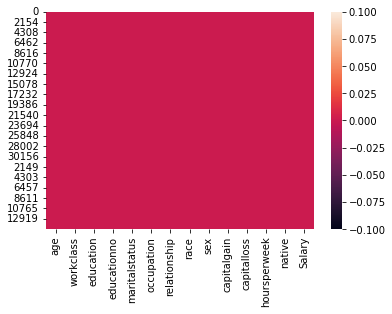

In [12]:
import seaborn as sns
sns.heatmap(df.isnull())

    index  Salary
0   <=50K   34013
1    >50K   11208


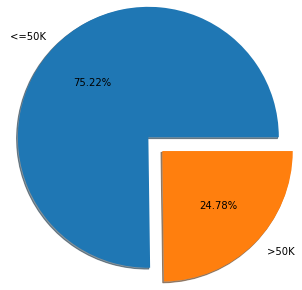

In [15]:
plt.rcParams['figure.figsize']=(3,3)
plt.pie(df.Salary.value_counts().values, labels = df.Salary.value_counts().index, autopct="%1.2f%%", radius =2, shadow=True, explode=(0,0.3))
print(df.Salary.value_counts().reset_index())

In [16]:
workclass_df = df.groupby(['Salary', 'workclass']).size().reset_index().rename(columns={0:'Num of individuals'})
workclass_df

,Salary,workclass,Num of individuals
0,<=50K,Federal-gov,857
1,<=50K,Local-gov,2185
2,<=50K,Private,26055
3,<=50K,Self-emp-inc,734
4,<=50K,Self-emp-not-inc,2737
5,<=50K,State-gov,1426
6,<=50K,Without-pay,19
7,>50K,Federal-gov,549
8,>50K,Local-gov,915
9,>50K,Private,7251


Text(0.5, 1.1, 'Workclass of individuals to corresponding Salary')

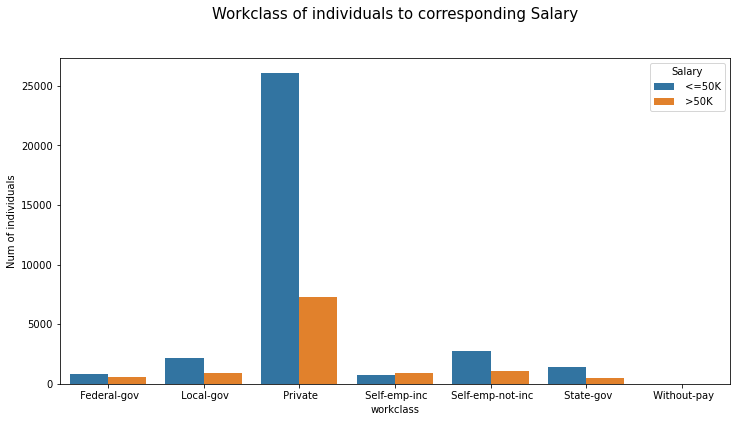

In [17]:
plt.rcParams['figure.figsize']=(12,6)
sns.barplot(x = 'workclass', y='Num of individuals', hue='Salary', data=workclass_df)
plt.title("Workclass of individuals to corresponding Salary", y = 1.1, fontsize=15)

 Observation:

* Most individuals are into private jobs with Salary <=50k.

* In our data there are very less individual who are without pay opr unemployed.

In [19]:
edu_df = df.groupby(['Salary', 'education']).size().reset_index().rename(columns={0:'Num of individuals'})
edu_df

,Salary,education,Num of individuals
0,<=50K,10th,1141
1,<=50K,11th,1530
2,<=50K,12th,534
3,<=50K,1st-4th,214
4,<=50K,5th-6th,427
5,<=50K,7th-8th,768
6,<=50K,9th,638
7,<=50K,Assoc-acdm,1109
8,<=50K,Assoc-voc,1455
9,<=50K,Bachelors,4392


Text(0.5, 1.03, 'Education of individuals to corresponding Salary')

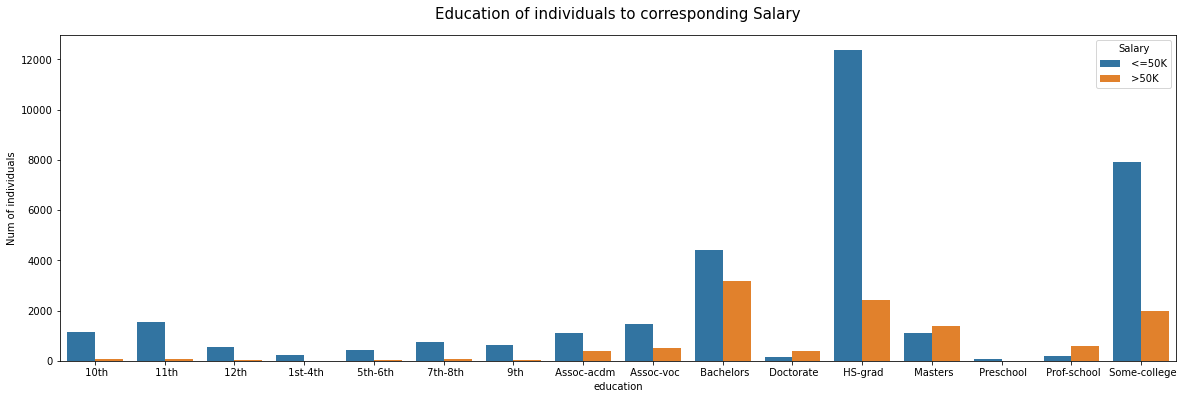

In [20]:
plt.rcParams['figure.figsize']=(20,6)
sns.barplot(x = 'education', y='Num of individuals', hue = 'Salary', data=edu_df)
plt.title("Education of individuals to corresponding Salary", y = 1.03, fontsize=15)

Observations:

* Most of the individuals have studied for 9 years.
* Then the highest rankings are individuals who have studied for 10 & 13 years.

In [21]:
rel_df = df.groupby(['maritalstatus', 'relationship', 'Salary']).size().reset_index().rename(columns={0:'Num of indv'})
rel_df

,maritalstatus,relationship,Salary,Num of indv
0,Divorced,Not-in-family,<=50K,2994
1,Divorced,Not-in-family,>50K,441
2,Divorced,Other-relative,<=50K,159
3,Divorced,Other-relative,>50K,7
4,Divorced,Own-child,<=50K,413
5,Divorced,Own-child,>50K,16
6,Divorced,Unmarried,<=50K,2076
7,Divorced,Unmarried,>50K,191
8,Married-AF-spouse,Husband,<=50K,7
9,Married-AF-spouse,Husband,>50K,4


Text(0.5, 1.1, 'Salary category wrt Marital status')

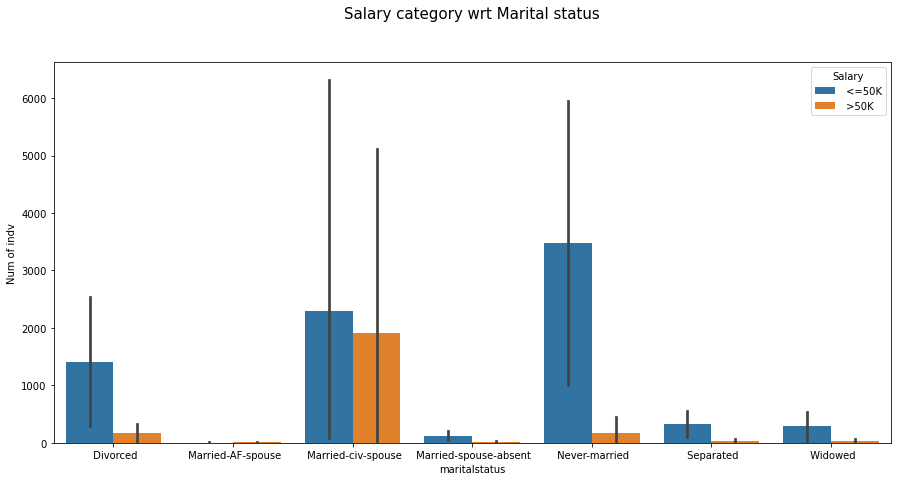

In [22]:
plt.rcParams['figure.figsize']=(15,7)
sns.barplot(x= 'maritalstatus', y='Num of indv', hue='Salary', data=rel_df)
plt.title("Salary category wrt Marital status", y = 1.1, fontsize=15)

 Most individuals in our data are who have never married and are earning <=50k.

Then we have individuals who are married indv earning <=50k and then married indv earning >50k.

Text(0.5, 1.1, 'Salary category wrt Relationship')

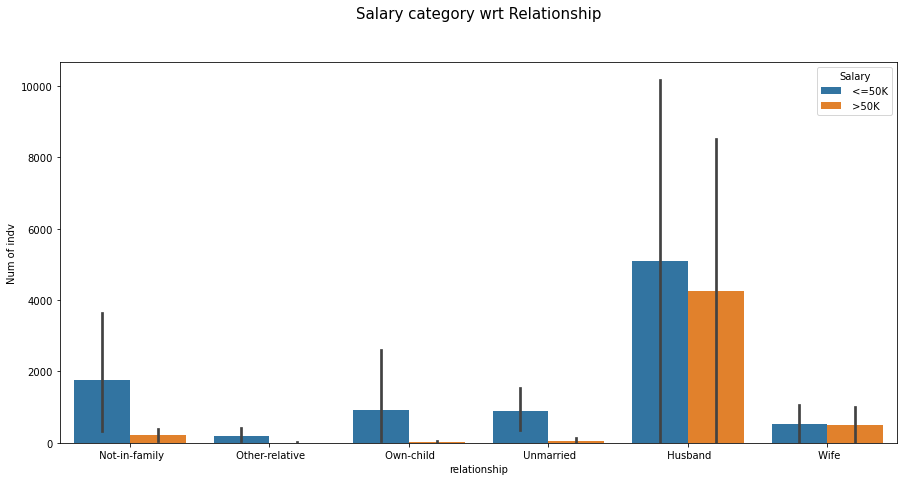

In [23]:
plt.rcParams['figure.figsize']=(15,7)
sns.barplot(x= 'relationship', y='Num of indv', hue='Salary', data=rel_df)
plt.title("Salary category wrt Relationship", y = 1.1, fontsize=15)

By this graph we can futher confirm that indv who are married, who have a husband are higher and are earning <=50k and >50k.

In [24]:
occ_df = df.groupby(['occupation', 'workclass', 'Salary']).size().reset_index().rename(columns={0:'Num of Indv'})
occ_df_sort = occ_df.sort_values('Num of Indv', ascending=False)

In [25]:
occ_df_sort.head()

,occupation,workclass,Salary,Num of Indv
86,Other-service,Private,<=50K,3816
4,Adm-clerical,Private,<=50K,3679
19,Craft-repair,Private,<=50K,3631
125,Sales,Private,<=50K,3348
72,Machine-op-inspct,Private,<=50K,2498


Text(0.5, 1.01, 'Diff occupations with corresponding workclass')

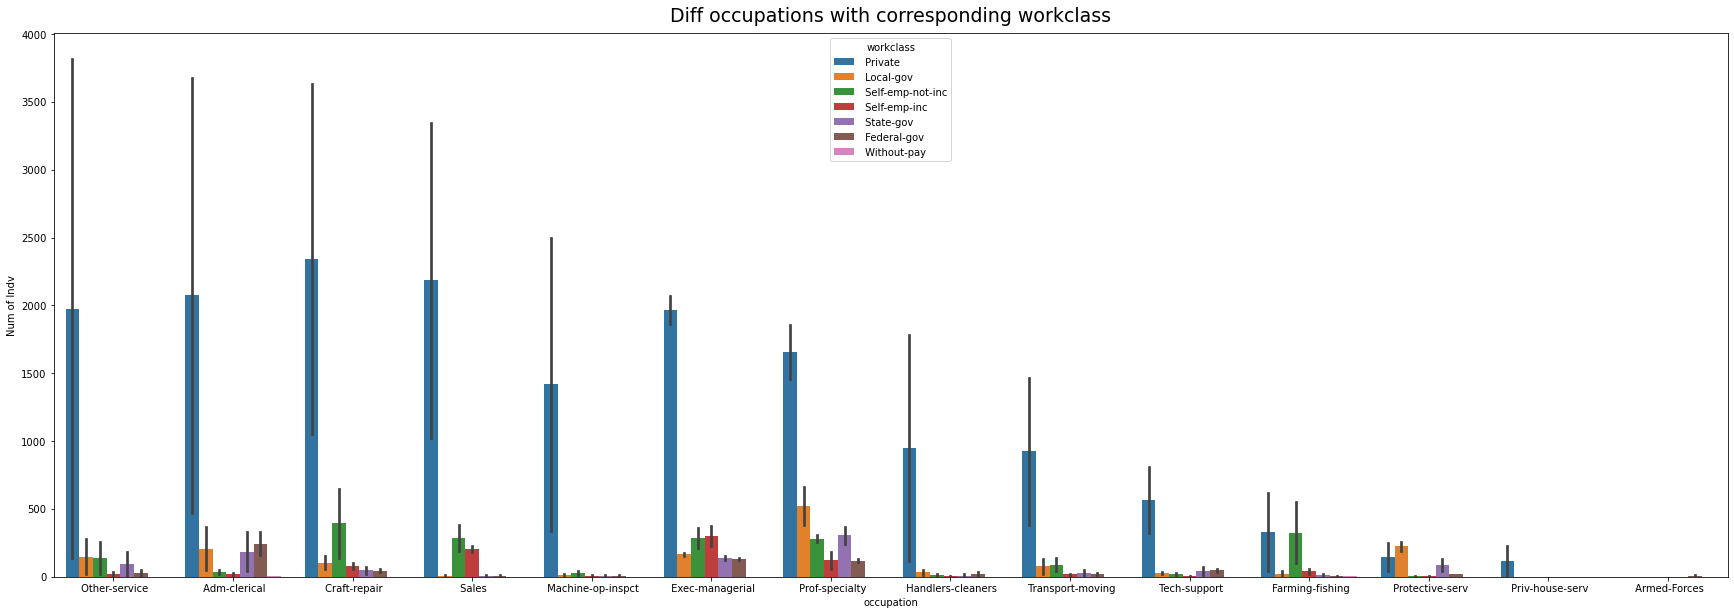

In [26]:
plt.rcParams['figure.figsize']=(30,10)
sns.barplot(x='occupation', y = 'Num of Indv', hue='workclass', data=occ_df_sort)
plt.title("Diff occupations with corresponding workclass", y=1.01, fontsize=19)

Private workclass indvs are highest in all occupations, except Protective-serv.

Highest num of indv are working in Other-service then Adm-clerical, then Craft-repair.

Text(0.5, 1.01, 'Salary categories corresponding to diff occupation')

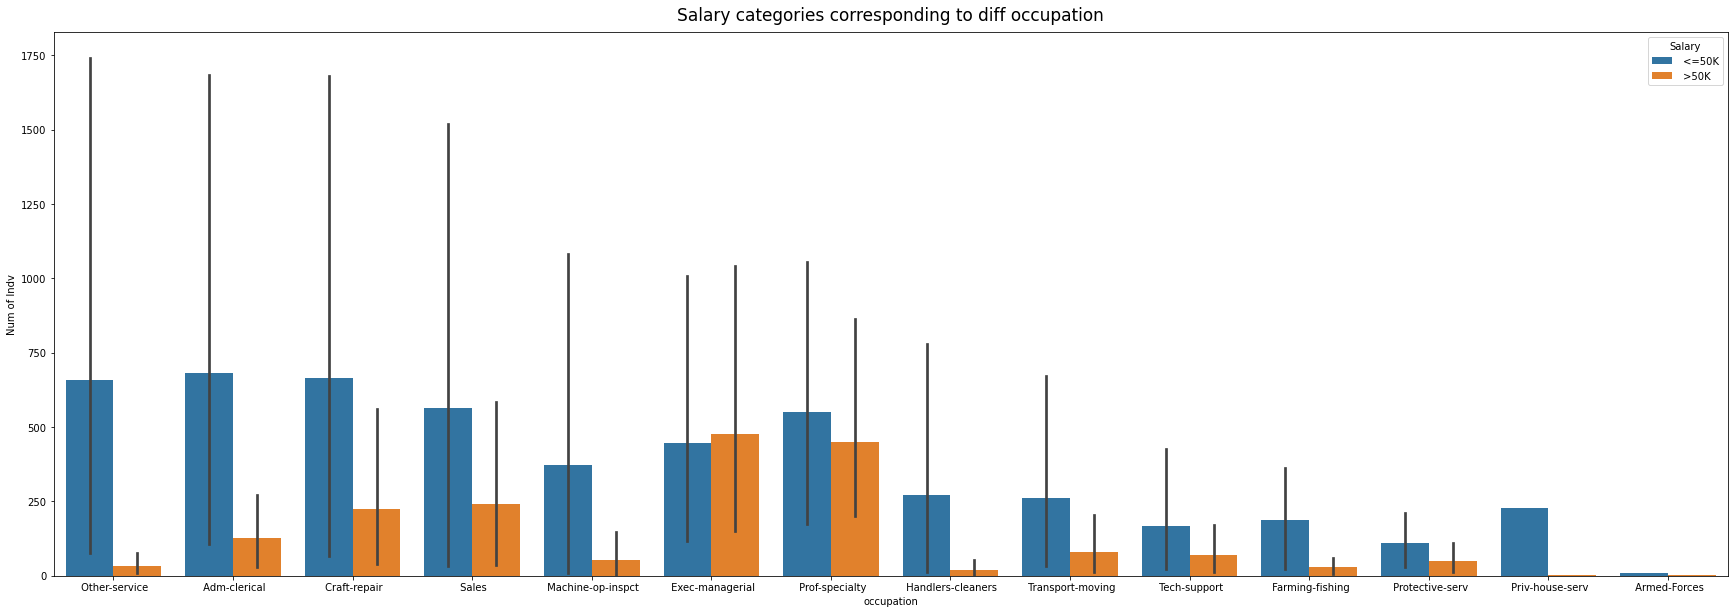

In [27]:
sns.barplot(x='occupation', y='Num of Indv', hue='Salary', data=occ_df_sort)
plt.title("Salary categories corresponding to diff occupation", y=1.01, fontsize=17)

In [28]:
race_df = df.groupby(['Salary', 'race']).size().reset_index().rename(columns={0:'Num of indv'})
race_df_sort = race_df.sort_values('Num of indv', ascending=False)
race_df_sort

,Salary,race,Num of indv
4,<=50K,White,28695
9,>50K,White,10207
2,<=50K,Black,3694
1,<=50K,Asian-Pac-Islander,934
7,>50K,Black,534
0,<=50K,Amer-Indian-Eskimo,382
6,>50K,Asian-Pac-Islander,369
3,<=50K,Other,308
5,>50K,Amer-Indian-Eskimo,53
8,>50K,Other,45


Text(0.5, 1.02, 'Salary dist according to race')

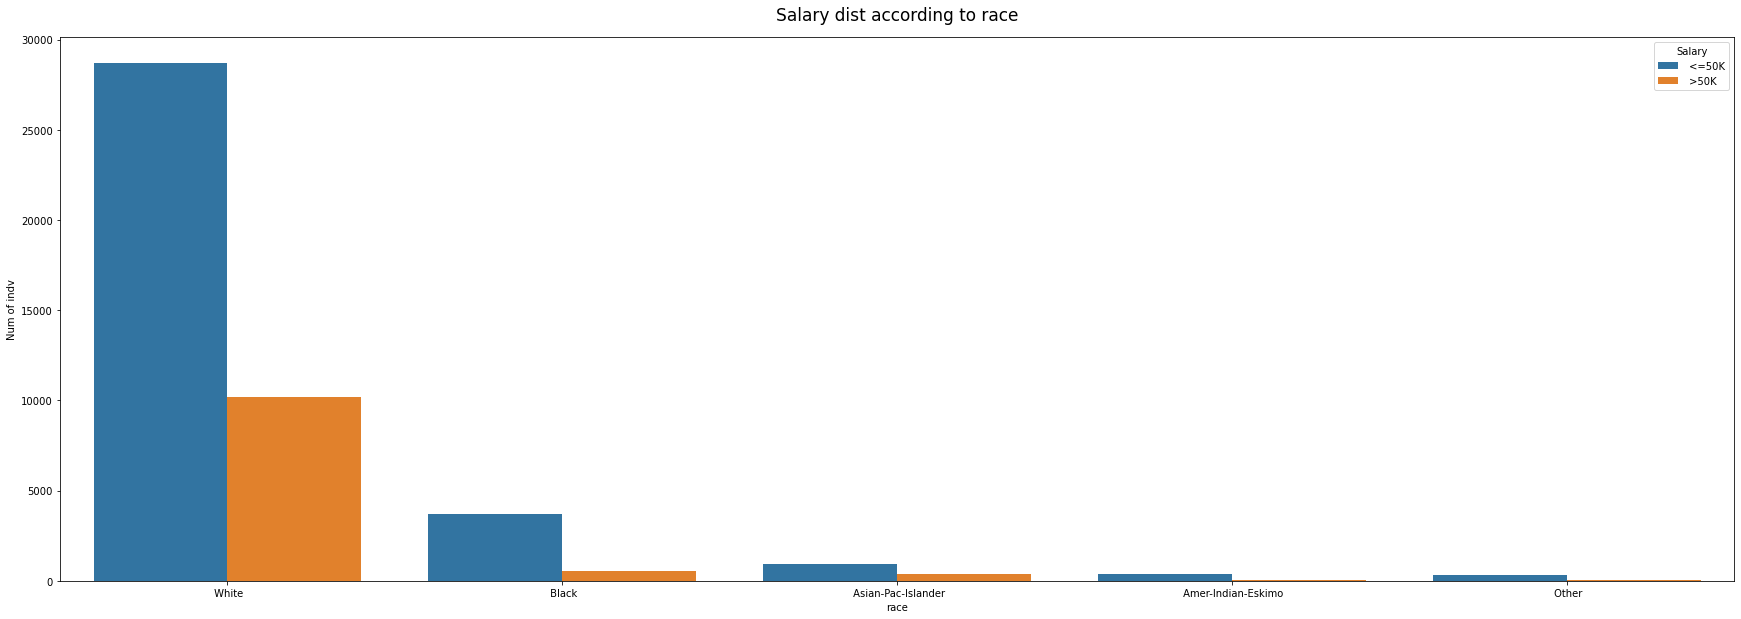

In [29]:
sns.barplot(x = 'race', y='Num of indv', hue='Salary', data=race_df_sort)
plt.title("Salary dist according to race", y=1.02, fontsize=17)

It is very evident that indv of race 'white' have the highest in our data and in both salary category <=50k and >50k.

In [30]:
sex_df = df.groupby(['Salary', 'sex']).size().reset_index().rename(columns={0:'Num of indv'})
sex_df_sort = sex_df.sort_values('Num of indv', ascending=False)
sex_df_sort

,Salary,sex,Num of indv
1,<=50K,Male,20988
0,<=50K,Female,13025
3,>50K,Male,9539
2,>50K,Female,1669


Text(0.5, 1.02, 'Salary dist according to sex')

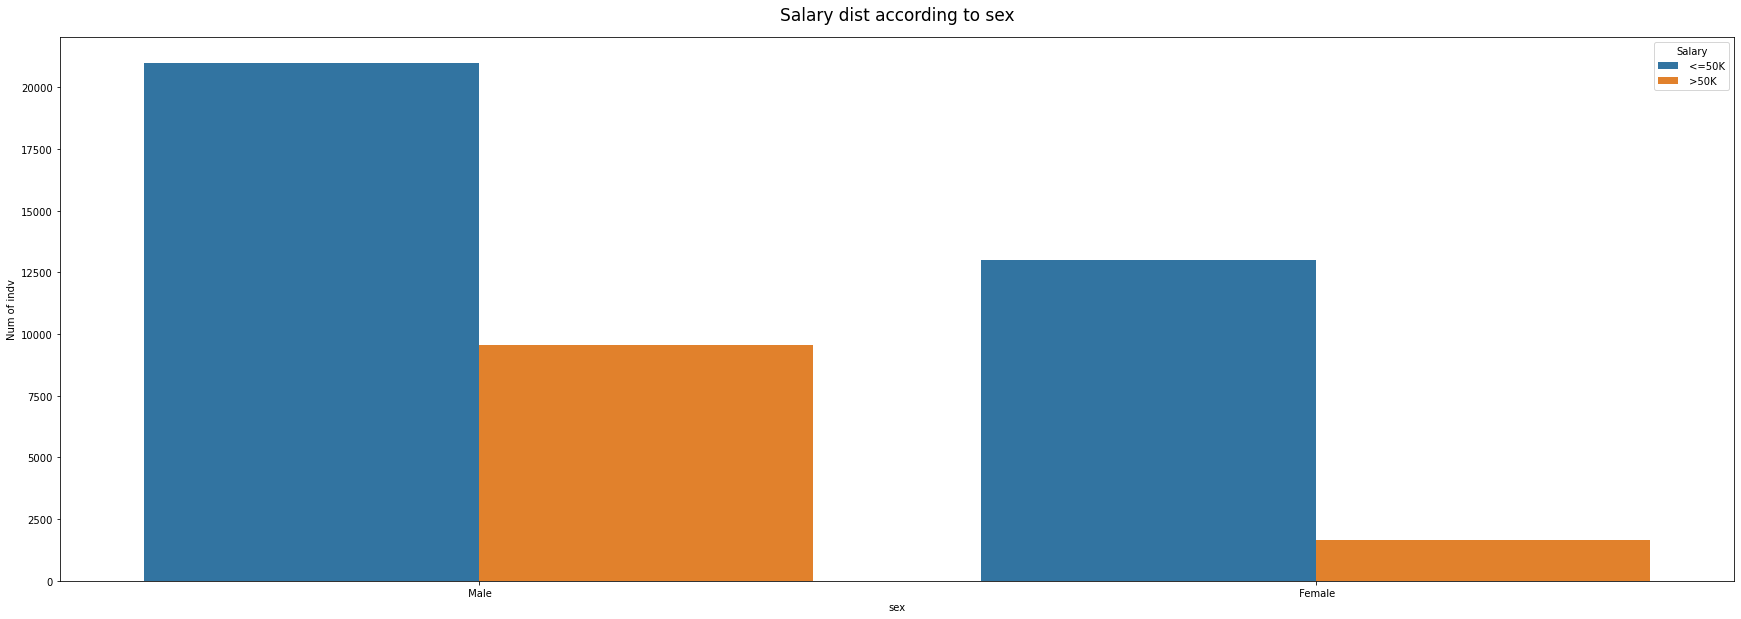

In [31]:
sns.barplot(x = 'sex', y='Num of indv', hue='Salary', data=sex_df_sort)
plt.title("Salary dist according to sex", y=1.02, fontsize=17)

Overall trend is male are doing more jobs than female and have higher ratio in both salary categories.

In [33]:
nat_df = df.groupby(['Salary','native']).size().reset_index().rename(columns={0:'Num of indv'})
nat_df_sort = nat_df.sort_values('Num of indv', ascending=False)
nat_df_sort.head()

,Salary,native,Num of indv
37,<=50K,United-States,30844
77,>50K,United-States,10448
24,<=50K,Mexico,856
28,<=50K,Philippines,199
31,<=50K,Puerto-Rico,155


Text(0.5, 1.01, 'Top 10 native locations corresponding to Salary')

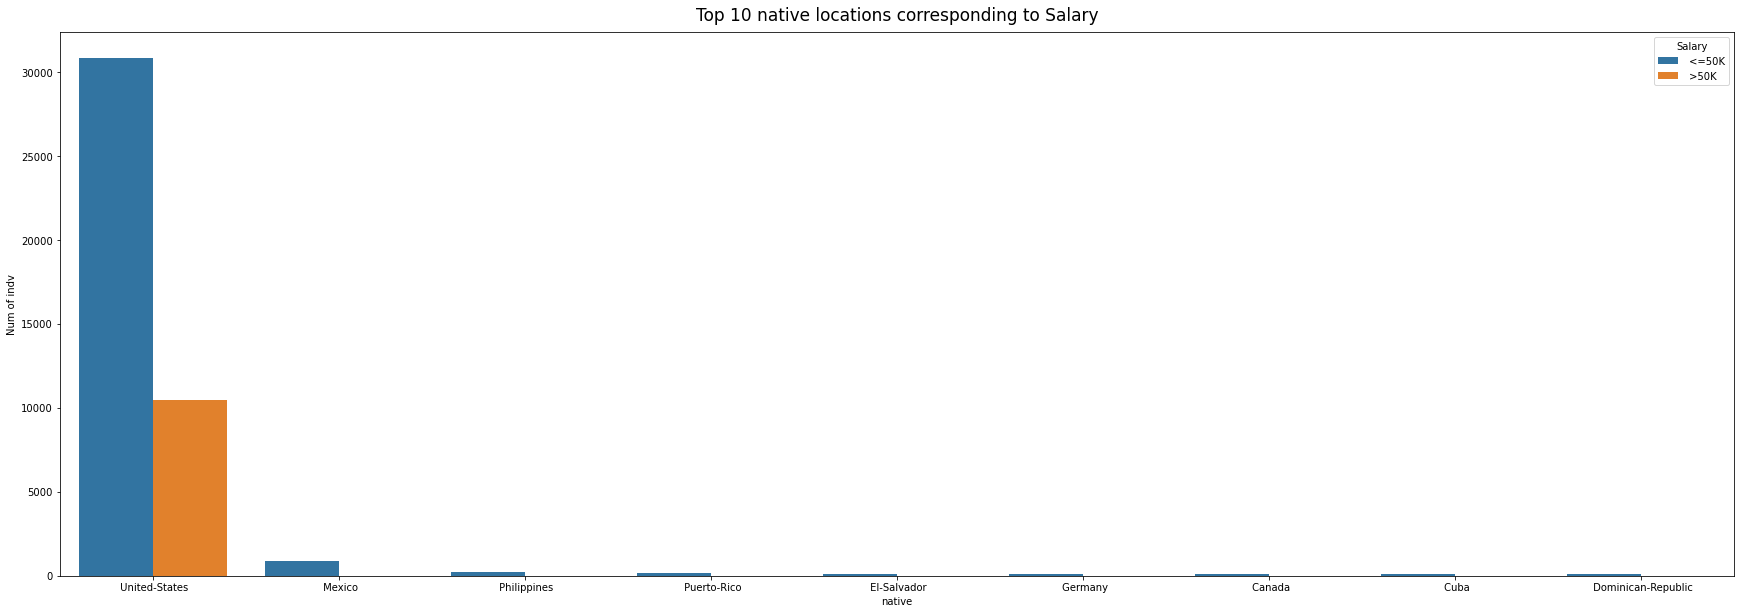

In [34]:
sns.barplot(x='native', y='Num of indv', hue='Salary', data=nat_df_sort.head(10))
plt.title("Top 10 native locations corresponding to Salary", fontsize=17, y=1.01)

Majority of indv are native to US.

Then next ranks go to Mexico, Philippines and Puerto-Rico

# Label Encoding

In [37]:
org_df = df.copy()

In [38]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:,-1])

In [39]:
df.head()            #0 - <=50K, 1- >50K

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


Text(0.5, 1.01, 'Age diff for salary category')

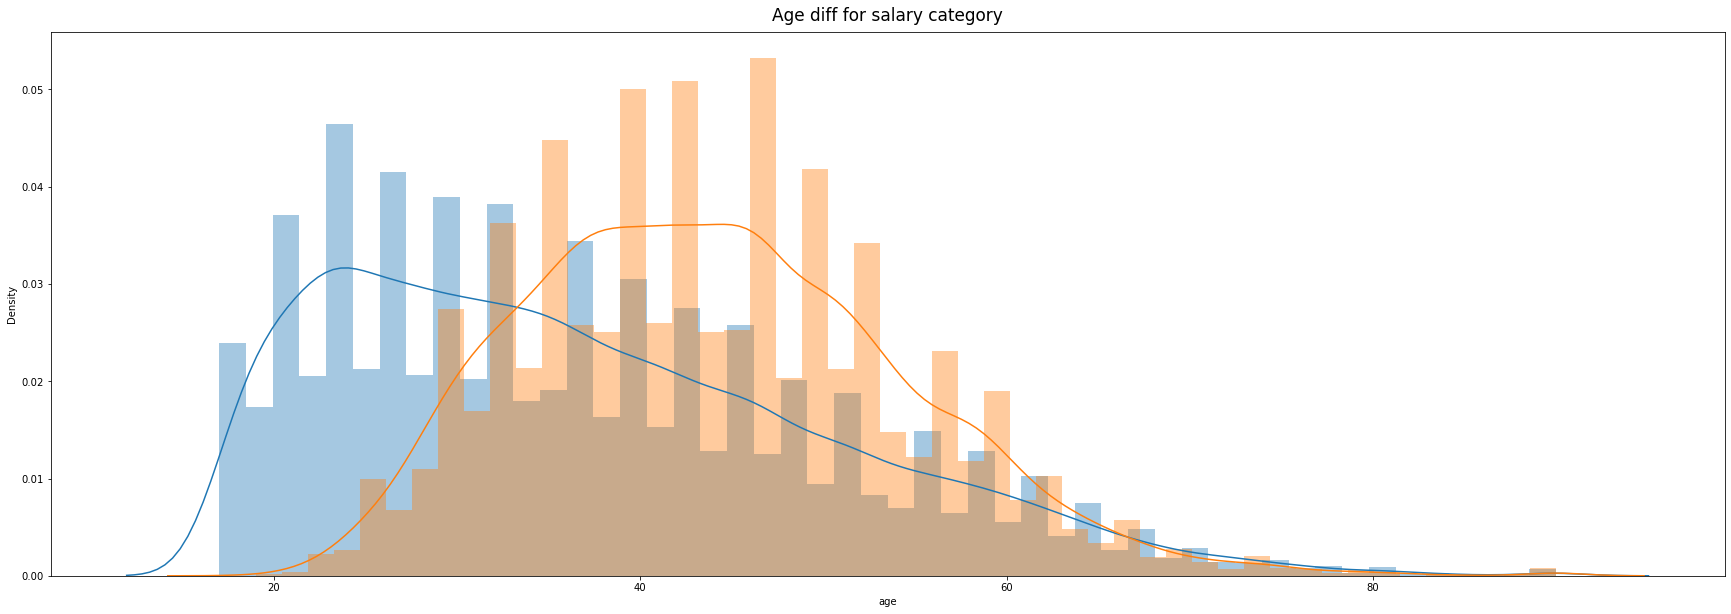

In [40]:
sns.distplot(df[df['Salary']==0]['age'])
sns.distplot(df[df['Salary']==1]['age'])                 #orange for Salary>50K, blue for Salary<=50K
plt.title("Age diff for salary category", y=1.01, fontsize=17)

Indv who have Salary<=50K are relatively younger.

Indv who have Salary>50K are comparitively older.

Text(0.5, 1.01, 'Capital Gain and Loss for salary <=50K')

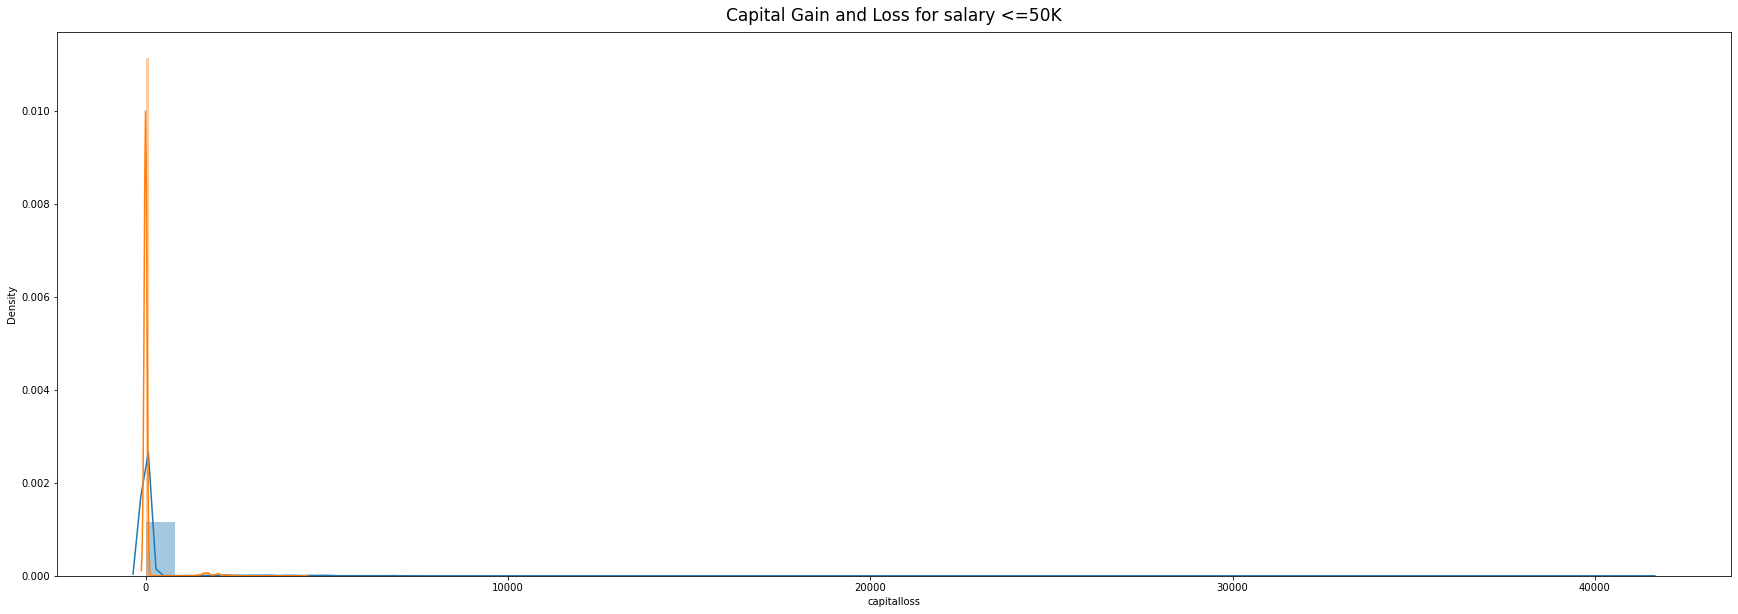

In [41]:
sns.distplot(df[df['Salary']==0]['capitalgain'])
sns.distplot(df[df['Salary']==0]['capitalloss'])    
plt.title("Capital Gain and Loss for salary <=50K", y=1.01, fontsize=17)      #orange for capitalloss, blue for capitalgain

Data is highly skewed.

Capital gain has a very large range from 0-45000, whereas capital loss has lower range from 0-5000.

Capital Loss for salaried indv <=50k are very high than capital gain.

Text(0.5, 1.01, 'Capital Gain and Loss for salary >50K')

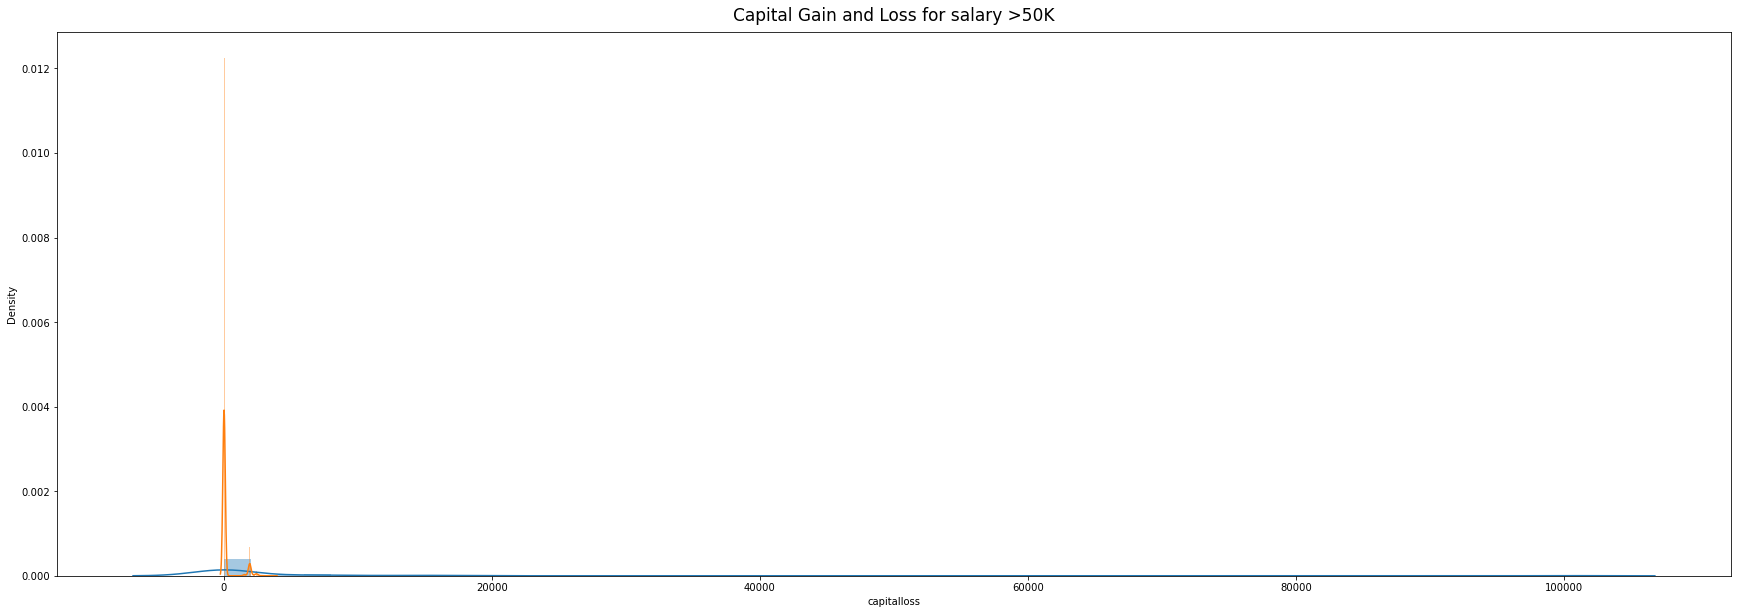

In [42]:
sns.distplot(df[df['Salary']==1]['capitalgain'])
sns.distplot(df[df['Salary']==1]['capitalloss'])     
plt.title("Capital Gain and Loss for salary >50K", y=1.01, fontsize=17)           #orange for capital loss, blue for capital gain

Data is highly skewed.

Capital gain has a very large range from 0-100000, whereas capital loss has lower range from 0-4000.

Capital Loss for salaried indv >50k are very high than capital gain.

Text(0.5, 1.01, 'Hours worked per week for diff salary category')

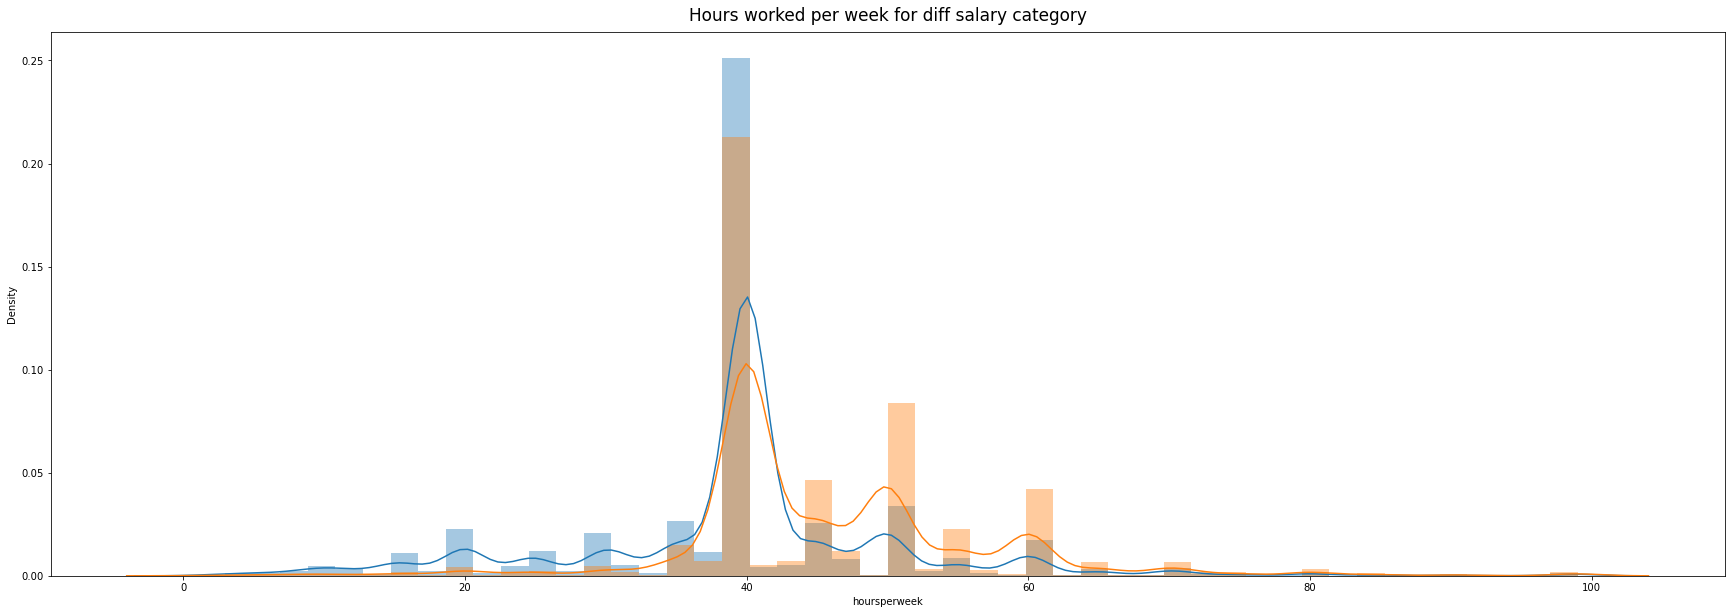

In [44]:
sns.distplot(df[df['Salary']==0]['hoursperweek'])
sns.distplot(df[df['Salary']==1]['hoursperweek'])     
plt.title("Hours worked per week for diff salary category", y=1.01, fontsize=17)           #orange for salary > 50K, blue for salary<=50K

Work hours for max indv are between 37-50 hours.

We can observe work hours are widely distributed for salary category >50K i.e between 35-60 hrs.

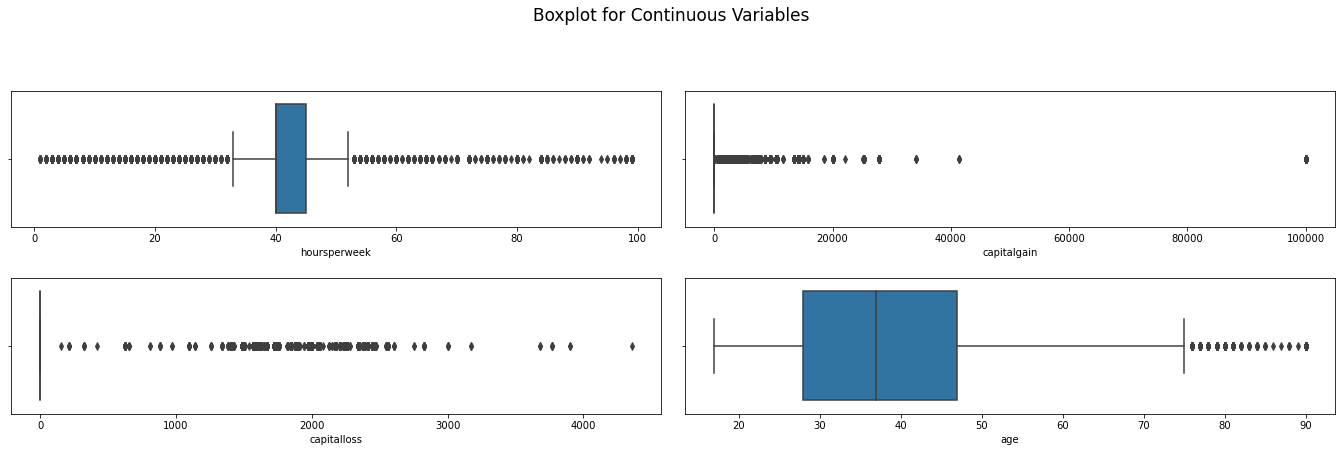

In [45]:
#check for outliers
fig, ax=plt.subplots(2,2, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(df.hoursperweek, ax=ax[0,0])
sns.boxplot(df.capitalgain, ax=ax[0,1])
sns.boxplot(df.capitalloss, ax=ax[1,0])
sns.boxplot(df.age, ax=ax[1,1])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

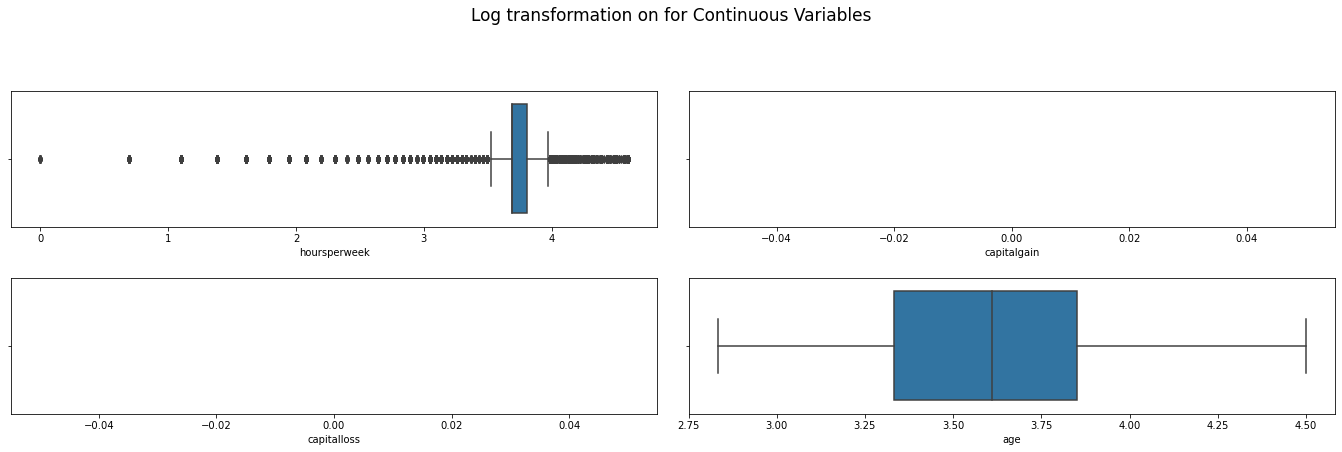

In [46]:
#Lets treat outlier by log transfromation
fig, ax=plt.subplots(2,2, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.log(df.hoursperweek), ax=ax[0,0])
sns.boxplot(np.log(df.capitalgain), ax=ax[0,1])
sns.boxplot(np.log(df.capitalloss), ax=ax[1,0])
sns.boxplot(np.log(df.age), ax=ax[1,1])
plt.suptitle("Log transformation on for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

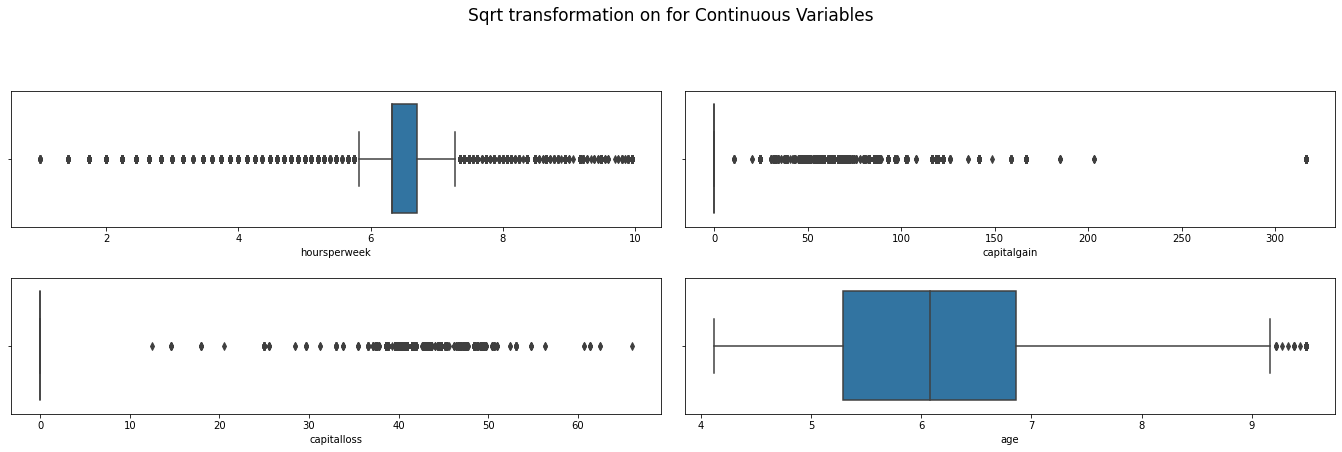

In [47]:
#Lets treat outlier by sqrt transfromation
fig, ax=plt.subplots(2,2, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.sqrt(df.hoursperweek), ax=ax[0,0])
sns.boxplot(np.sqrt(df.capitalgain), ax=ax[0,1])
sns.boxplot(np.sqrt(df.capitalloss), ax=ax[1,0])
sns.boxplot(np.sqrt(df.age), ax=ax[1,1])
plt.suptitle("Sqrt transformation on for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

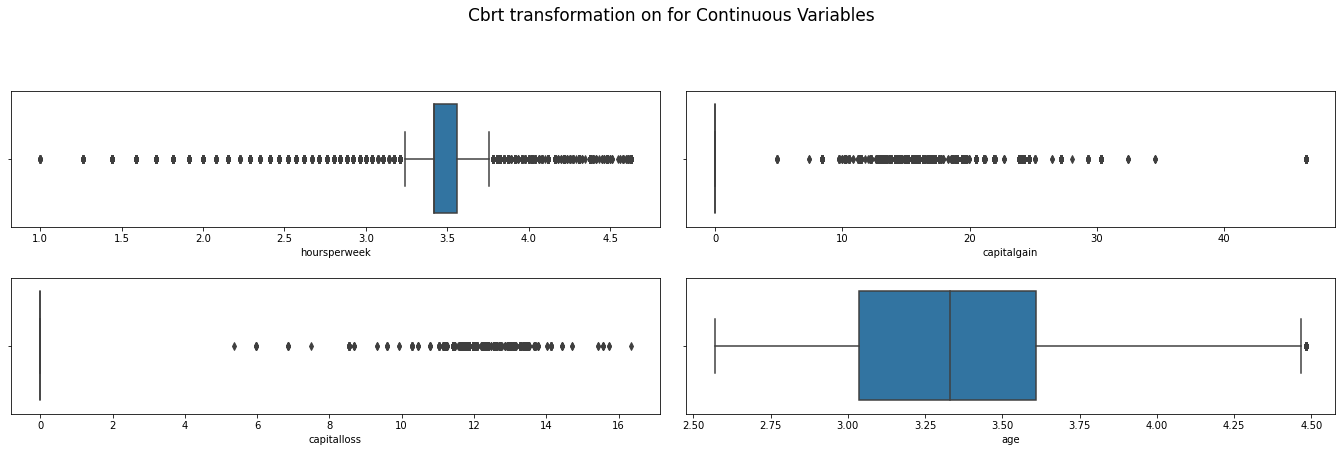

In [48]:
#Lets treat outlier by cbrt transfromation
fig, ax=plt.subplots(2,2, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.cbrt(df.hoursperweek), ax=ax[0,0])
sns.boxplot(np.cbrt(df.capitalgain), ax=ax[0,1])
sns.boxplot(np.cbrt(df.capitalloss), ax=ax[1,0])
sns.boxplot(np.cbrt(df.age), ax=ax[1,1])
plt.suptitle("Cbrt transformation on for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

Only log trnasformation was helpful to treat outliers in age column.

All the rest columns did not perform well with transformation.

### Relation of "Target variable" with other features.

In [50]:
#Correlation of continuous variable with target variable
corr_s = df.corr().iloc[:,-1].reset_index().rename(columns={'index':'feature', 'Salary':'corr'}) 
corr_s

,feature,corr
0,age,0.237035
1,educationno,0.332801
2,capitalgain,0.221033
3,capitalloss,0.148799
4,hoursperweek,0.227199
5,Salary,1.000000


Text(0.5, 1.01, 'Corr of continuous features with Target variable')

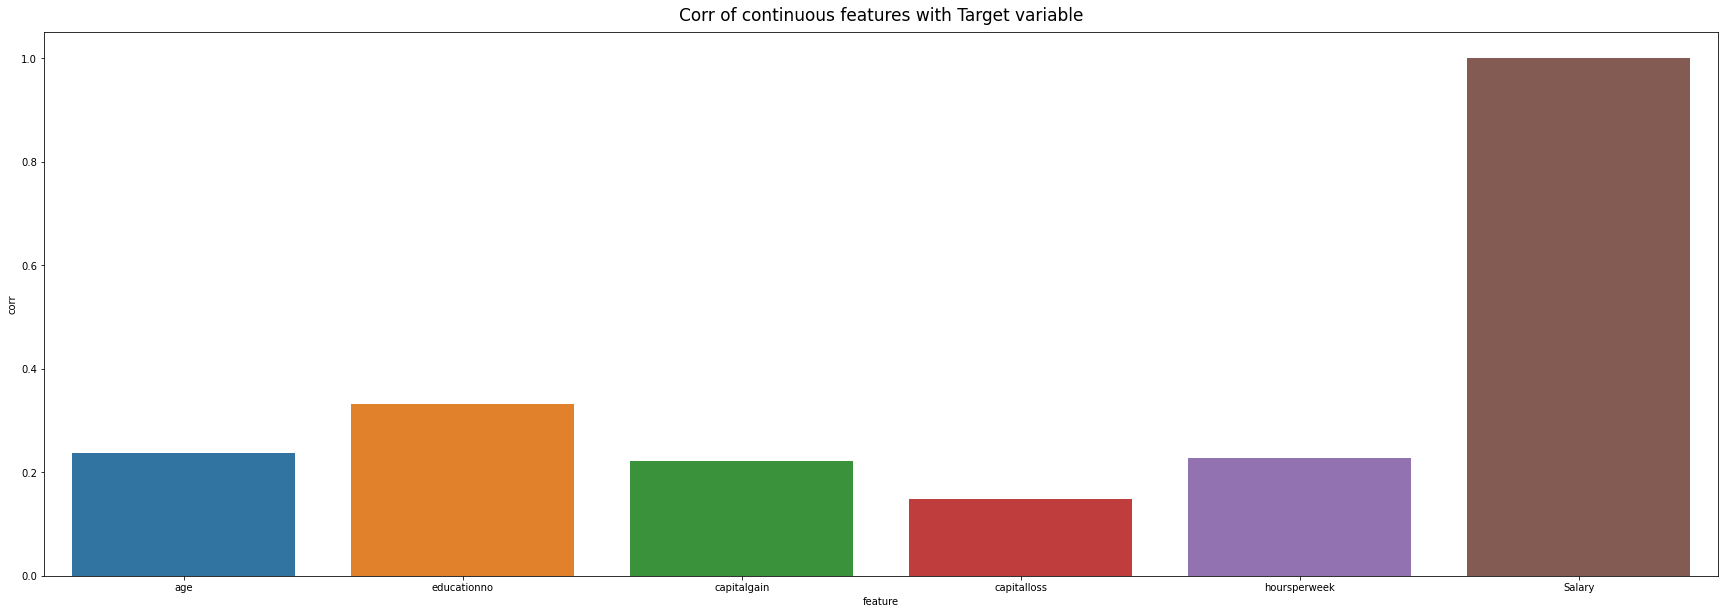

In [51]:
sns.barplot(x='feature', y='corr', data=corr_s)
plt.title("Corr of continuous features with Target variable", fontsize=17, y=1.01)

All countinuous variables have positive correlation with Target variable - Salary.

Text(0.5, 1.01, 'Correlation Map of Countinuous variables with Target variable')

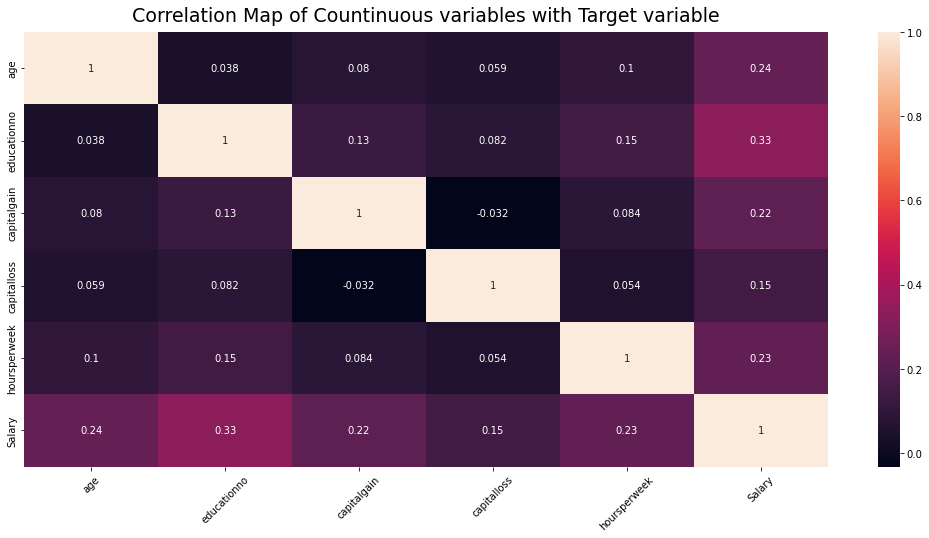

In [53]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True);
plt.xticks(rotation=45)
plt.title("Correlation Map of Countinuous variables with Target variable", fontsize=19, y = 1.01)

We can get insights from last row of the plots for our prediction model.

Marital status, relationship, age have ppscore among all the fetures.

# Data Preprocessing

## Feature encoding

In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
df_train = df_train.apply(LabelEncoder().fit_transform)
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [72]:
df_test = df_test.apply(LabelEncoder().fit_transform)
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


# Test-Train-Split

In [73]:
drop_elements = ['education', 'native', 'Salary']
X = df_train.drop(drop_elements, axis=1)

In [74]:
y = df_train['Salary']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Building Multinomial Naive Bays Model

In [76]:
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(X_train, y_train)

MultinomialNB()

In [77]:
score_multinomial_train = classifier_mb.score(X_train,y_train)
print('The accuracy of Gaussian Naive Bayes is', score_multinomial_train)

The accuracy of Gaussian Naive Bayes is 0.7788390161825111


The accuracy of Gaussian Naive Bayes is 0.7788390161825111

In [78]:
score_multinomial = classifier_mb.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_multinomial)

The accuracy of Gaussian Naive Bayes is 0.7796865581675708


The accuracy of Gaussian Naive Bayes is 0.7796865581675708

# Testing Multinomial Naive Bayes model on SalaryData_Test.csv

In [79]:
from sklearn import metrics

drop_elements = ['education', 'native', 'Salary']
X_new = df_test.drop(drop_elements, axis=1)

y_new = df_test['Salary']

In [80]:
# make predictions
new_prediction = classifier_mb.predict(X_new)
# summarize the fit of the model
print(metrics.classification_report(y_new, new_prediction))
print(metrics.confusion_matrix(y_new, new_prediction))

print("Accuracy:",metrics.accuracy_score(y_new, new_prediction))
print("Precision:",metrics.precision_score(y_new, new_prediction))
print("Recall:",metrics.recall_score(y_new, new_prediction))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87     11360
           1       0.61      0.30      0.40      3700

    accuracy                           0.78     15060
   macro avg       0.71      0.62      0.63     15060
weighted avg       0.76      0.78      0.75     15060

[[10648   712]
 [ 2587  1113]]
Accuracy: 0.7809428950863214
Precision: 0.6098630136986302
Recall: 0.3008108108108108


# Building Gaussian Naive Bayes Model

In [81]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB as GB

classifier_gb = GB()
classifier_gb.fit(X_train, y_train)

GaussianNB()

In [82]:
score_gaussian_train = classifier_gb.score(X_train,y_train)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian_train)

The accuracy of Gaussian Naive Bayes is 0.8108576235957836


The accuracy of Gaussian Naive Bayes is 0.8108576235957836

In [83]:
score_gaussian = classifier_gb.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 0.812035362668274


The accuracy of Gaussian Naive Bayes is 0.812035362668274

# Testing Gaussian Naive Bays model on SalaryData_Test.csv

In [84]:
# make predictions
new_prediction = classifier_gb.predict(X_new)
# summarize the fit of the model
print(metrics.classification_report(y_new, new_prediction))
print(metrics.confusion_matrix(y_new, new_prediction))

print("Accuracy:",metrics.accuracy_score(y_new, new_prediction))
print("Precision:",metrics.precision_score(y_new, new_prediction))
print("Recall:",metrics.recall_score(y_new, new_prediction))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88     11360
           1       0.69      0.45      0.54      3700

    accuracy                           0.81     15060
   macro avg       0.76      0.69      0.71     15060
weighted avg       0.80      0.81      0.80     15060

[[10604   756]
 [ 2038  1662]]
Accuracy: 0.8144754316069057
Precision: 0.6873449131513648
Recall: 0.4491891891891892


# Compare train and test accuracy

### The training-set accuracy score is 0.8108 while the test-set accuracy to be 0.8120.

### These two values are quite comparable. So, there is no sign of overfitting